In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import umap.umap_ as umap
import matplotlib.pyplot as plt
metadata = pd.read_csv("20200711_patchseq_metadata_mouse.csv" ,index_col=0)
metadata.head()

,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,medical_conditions,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
project,,,,,,,,,,,,,,,,,,,,,
mIVSCC-MET,601506507,Vip-IRES-Cre;Ai14-331294.04.01.01,left,VISpm4,331294,Vip-IRES-Cre;Ai14-331294,M,P55,NaN,NaN,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
mIVSCC-MET,601790961,Sst-IRES-Cre;Ai14-331663.04.01.01,left,VISpm5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
mIVSCC-MET,601803754,Sst-IRES-Cre;Ai14-331663.04.02.02,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
mIVSCC-MET,601808698,Sst-IRES-Cre;Ai14-331663.04.02.03,right,VISp5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
mIVSCC-MET,601810307,Sst-IRES-Cre;Ai14-331663.04.02.04,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3


In [3]:
 file_manifest = pd.read_excel("2021-09-13_mouse_file_manifest.xlsx")
#file_manifest = pd.read_excel(r"C:\Users\75976\OneDrive\桌面\2021-09-13_mouse_file_manifest.xls")

file_manifest.head()

,file_id,file_name,file_size,sha256_checksum,md5_checksum,technique,file_type,archive,archive_uri,project,cell_specimen_id
0,601506507,601506507.marker,268,305938ce75d55c3f43fbbe2d1d57e203139fa0c357bd73...,ecf2285ccbf5274af7d6a31a855ce950,morphology,marker_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
1,601506507,601506507_raw.swc,160503,6c82f5f974e4f6d2336a3606d4955823edd3c0173da60d...,7cc7ccdd627ef83fe54fcbf0feac79c2,morphology,raw_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
2,601506507,601506507_transformed.swc,271764,bad13a99c8f7f8a375e43109d80fd23d7028555a7dc42b...,f6a365d86ff65370af26439f0f16caaf,morphology,transformed_swc,BIL,ftp://download.brainlib.org:8811/biccn/zeng/ps...,mIVSCC-MET,601506507.0
3,601506492,sub-599387254_ses-601506492_icephys.nwb,17881801,54003c5b599fa8081938713e8c7c3b69d1883b31b3ada1...,d854a21668f5f2229024d8cf0975de54,intracellular_electrophysiology,nwb,DANDI,https://api.dandiarchive.org/api/assets/e734ba...,mIVSCC-MET,601506507.0
4,609481756,PS0810_E1-50_GCTCATGA-TCTCTCCG_R2.fastq.gz,48014090,a2954fc88cb34bc30b9bca9e9f1a0cff2c9b53cf9a7268...,fc9441d44f1fab3e5b31cbb2c57228b0,transcriptomics,reverse_fastq,NEMO,http://data.nemoarchive.org/other/AIBS/AIBS_pa...,mIVSCC-MET,601506507.0


In [4]:
gene_data = pd.read_csv(
    "20200513_Mouse_PatchSeq_Release_cpm.v2.csv",
    index_col=0,
)

In [8]:
# Identify the cells from a particular t-type (Lamp5 Plch2 Dock5)
my_ttype_metadata = metadata.loc[metadata["T-type Label"] == "Pvalb Gabrg1", :]

my_ttype_metadata

,cell_specimen_id,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,medical_conditions,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
project,,,,,,,,,,,,,,,,,,,,,
mIVSCC-MET,645375521,Chrna2-Cre_OE25;Ai14-356148.04.02.01,right,VISp6a,356148,Chrna2-Cre_OE25;Ai14-356148,M,P46,NaN,NaN,...,NaN,NaN,NaN,NaN,645375490,SM-GE643_S151_E1-50,RSC-131,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,650402689,Crh-IRES-Cre_ZJH;Sst-IRES-FlpO;Ai65-362355.03....,right,VISp5,362355,Crh-IRES-Cre_ZJH;Sst-IRES-FlpO;Ai65-362355,M,P43,NaN,NaN,...,NaN,NaN,NaN,NaN,650402628,SM-GE65Z_S067_E1-50,RSC-135,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,657859611,Th-Cre_FI172;Ai14-363501.04.01.01,left,VISp6a,363501,Th-Cre_FI172;Ai14-363501,M,P87,NaN,NaN,...,NaN,NaN,NaN,NaN,657859595,SM-GE8ZI_S160_E1-50,RSC-142,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,657860437,Th-Cre_FI172;Ai14-363501.04.02.01,right,VISp5,363501,Th-Cre_FI172;Ai14-363501,M,P87,NaN,NaN,...,NaN,NaN,NaN,NaN,657860422,SM-GE8ZI_S159_E1-50,RSC-142,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,669072736,Sst-IRES-Cre;Ai14-376206.04.02.02,right,VISp6a,376206,Sst-IRES-Cre;Ai14-376206,F,P58,NaN,NaN,...,NaN,full,0.832686,NaN,669072632,SM-GE918_S036_E1-50,RSC-148,CS180626100051,Pvalb Gabrg1,Pvalb-MET-1
mIVSCC-MET,672977850,Chrna2-Cre_OE25;Ai14-379136.03.02.02,right,VISpor6a,379136,Chrna2-Cre_OE25;Ai14-379136,F,P50,NaN,NaN,...,NaN,NaN,NaN,NaN,672977572,SM-GE93P_S018_E1-50,RSC-150,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,679300054,Th-Cre_FI172;Ai14-382502.03.02.01,right,VISp6a,382502,Th-Cre_FI172;Ai14-382502,F,P51,NaN,NaN,...,NaN,NaN,NaN,NaN,679299969,SM-GE93J_S081_E1-50,RSC-152,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,679590711,Th-Cre_FI172;Ai14-382500.04.02.01,right,VISp6a,382500,Th-Cre_FI172;Ai14-382500,M,P52,NaN,NaN,...,NaN,NaN,NaN,NaN,679590544,SM-GE93V_S036_E1-50,RSC-153,CS180626100051,Pvalb Gabrg1,NaN
mIVSCC-MET,679620100,Th-Cre_FI172;Ai14-382500.03.02.01,right,VISl5,382500,Th-Cre_FI172;Ai14-382500,M,P52,NaN,NaN,...,NaN,NaN,NaN,NaN,679619991,SM-GE93V_S061_E1-50,RSC-153,CS180626100051,Pvalb Gabrg1,NaN


In [9]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Pvalb Gabrg1") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]

In [10]:
my_ttype_with_recon_metadata.iloc[0, :]

cell_specimen_id                                      669072736
cell_specimen_name            Sst-IRES-Cre;Ai14-376206.04.02.02
hemisphere                                                right
structure                                                VISp6a
donor_id                                                 376206
donor_name                             Sst-IRES-Cre;Ai14-376206
biological_sex                                                F
age                                                         P58
ethnicity                                                   NaN
medical_conditions                                          NaN
full_genotype                  Sst-IRES-Cre/wt;Ai14(RCL-tdT)/wt
dendrite_type                                            aspiny
apical_dendrite_status                                      NaN
neuron_reconstruction_type                                 full
cell_soma_normalized_depth                             0.832686
depth_from_pia_um                       

In [11]:
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

In [12]:
swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [13]:
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/669072736_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "/biccn/zeng/pseq/morph/200526"
filename = "669072736_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


In [14]:
swc_path = swc_urls["file_name"].values[0]
swc_path

'669072736_transformed.swc'

In [15]:
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.constants import AXON, BASAL_DENDRITE, SOMA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

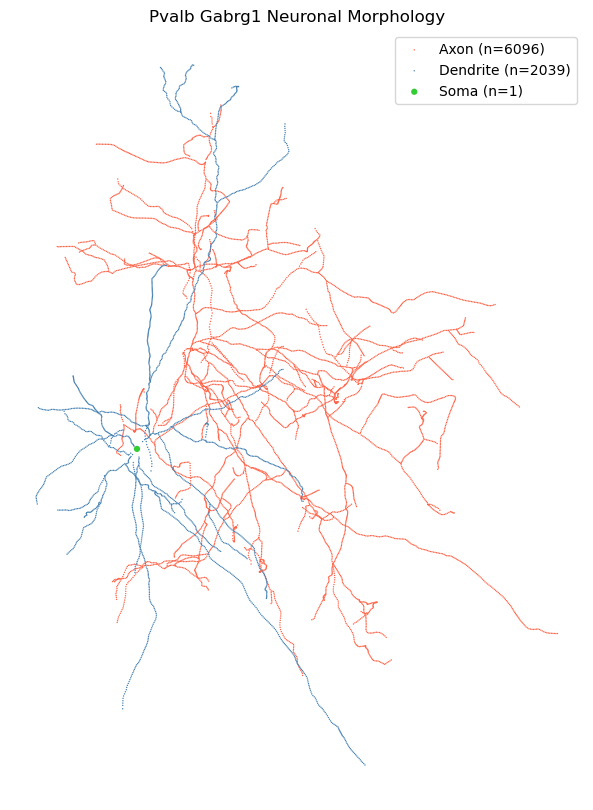

In [16]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Pvalb Gabrg1 Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

feature_extraction_run.results

width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)

from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

def extract_features(morph):
    fe = FeatureExtractor()
    fe.register_features(default_features)
    feature_extraction_run = fe.extract(Data(morph))
    
    width = feature_extraction_run.results["axon.node.dimension"]["width"]
    height = feature_extraction_run.results["axon.node.dimension"]["height"]
    wh_ratio = width / height
    
    return width, height, wh_ratio

# Usage
morph =morphology_from_swc(swc_path)  # Ensure you have a function or method to load or refresh your morphology data
width, height, wh_ratio = extract_features(morph)
print(width, height, wh_ratio)


# Pvalb Th Sst

In [20]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Pvalb Th Sst") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [21]:
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/644571405_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "/biccn/zeng/pseq/morph/200526"
filename = "644571405_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


In [22]:
swc_path = swc_urls["file_name"].values[0]
swc_path

'644571405_transformed.swc'

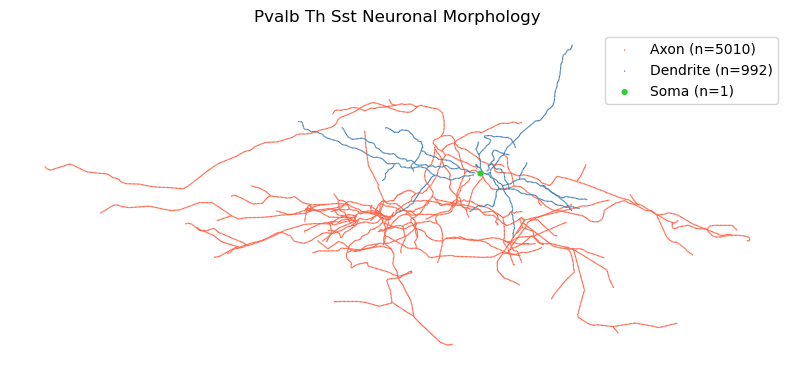

In [23]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Pvalb Th Sst Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


In [24]:
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

2024-08-29 02:06:35,601 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:35,604 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:35,605 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:35,606 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x0000023421FD9290>>
2024-08-29 02:06:35,607 root         INFO     skipping feature: apical_dendrite.compartment.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:35,608 root         INFO     skipping feature: apical_dendrite.tip.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:35,608 root         INFO     skipping feature: apical_dendrite.bifurcation.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:35,609 root         INFO     skipping feature: apical_dendrite.node.dimension. Found 

2024-08-29 02:06:35,649 root         INFO     skipping feature: apical_dendrite.apical_dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresApical', 'RequiresLayeredPointDepths']
2024-08-29 02:06:35,650 root         INFO     selected features: ['dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'axon.compartment.dimension', 'all_neurites.compartment.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'axon.tip.dimension', 'all_neurites.tip.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'axon.bifurcation.dimension', 'all_neurites.bifurcation.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'axon.node.dimension', 'all_neurites.node.dimension', 'dendrite.num_nodes', 'basal_dendrite.num_nodes', 'axon.num_nodes', 'all_neurites.num_nodes', 'dendrite.num_branches', 'basal_dendrite.num_branches', 'axon.num_branches', 'all_neurites.num_branches', 'dendri

In [25]:
feature_extraction_run.results

{'dendrite.compartment.dimension': {'width': 608.064138727233,
  'height': 258.3839998692721,
  'depth': 273.73647028354947,
  'min_xyz': array([-375.62637353, -148.181573  ,  -47.38300333]),
  'max_xyz': array([232.43776519, 110.20242687, 226.35346695]),
  'bias_xyz': array([143.18860834, -37.97914613, 178.97046362])},
 'basal_dendrite.compartment.dimension': {'width': 608.064138727233,
  'height': 258.3839998692721,
  'depth': 273.73647028354947,
  'min_xyz': array([-375.62637353, -148.181573  ,  -47.38300333]),
  'max_xyz': array([232.43776519, 110.20242687, 226.35346695]),
  'bias_xyz': array([143.18860834, -37.97914613, 178.97046362])},
 'axon.compartment.dimension': {'width': 608.064138727233,
  'height': 258.3839998692721,
  'depth': 273.73647028354947,
  'min_xyz': array([-375.62637353, -148.181573  ,  -47.38300333]),
  'max_xyz': array([232.43776519, 110.20242687, 226.35346695]),
  'bias_xyz': array([143.18860834, -37.97914613, 178.97046362])},
 'all_neurites.compartment.dimen

In [26]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)

608.5663564690141 211.61184680469432 2.875861468335873


# Sst Nts

In [27]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Sst Nts") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [28]:
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/679457550_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "/biccn/zeng/pseq/morph/200526"
filename = "679457550_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


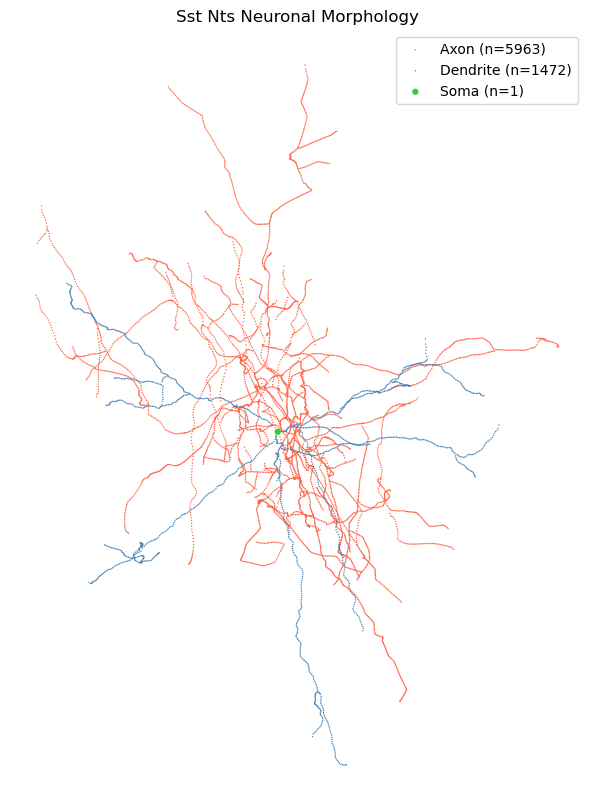

In [29]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Sst Nts Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


In [30]:
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
from neuron_morphology.features.default_features import default_features

fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

2024-08-29 02:06:46,435 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:46,439 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:46,440 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:46,442 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x000002349C57B710>>
2024-08-29 02:06:46,443 root         INFO     skipping feature: apical_dendrite.compartment.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:46,444 root         INFO     skipping feature: apical_dendrite.tip.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:46,446 root         INFO     skipping feature: apical_dendrite.bifurcation.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:46,447 root         INFO     skipping feature: apical_dendrite.node.dimension. Found 

2024-08-29 02:06:46,483 root         INFO     skipping feature: apical_dendrite.apical_dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresApical', 'RequiresLayeredPointDepths']
2024-08-29 02:06:46,484 root         INFO     selected features: ['dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'axon.compartment.dimension', 'all_neurites.compartment.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'axon.tip.dimension', 'all_neurites.tip.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'axon.bifurcation.dimension', 'all_neurites.bifurcation.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'axon.node.dimension', 'all_neurites.node.dimension', 'dendrite.num_nodes', 'basal_dendrite.num_nodes', 'axon.num_nodes', 'all_neurites.num_nodes', 'dendrite.num_branches', 'basal_dendrite.num_branches', 'axon.num_branches', 'all_neurites.num_branches', 'dendri

ZeroDivisionError: division by zero

In [ ]:
feature_extraction_run.results

In [ ]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)

# Sst Chodl

In [17]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Sst Chodl") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/640061596_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "640061596_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


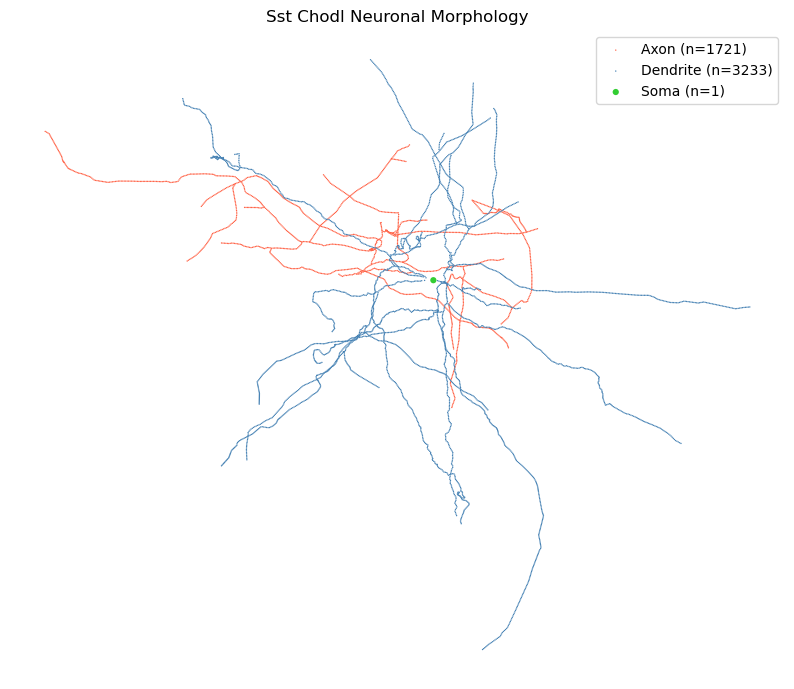

In [18]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Sst Chodl Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


In [32]:
fe = FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

2024-08-29 02:06:51,275 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:51,281 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:51,282 root         INFO     skipping mark (validation failed): type
2024-08-29 02:06:51,284 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x0000023422829190>>
2024-08-29 02:06:51,285 root         INFO     skipping feature: apical_dendrite.compartment.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:51,285 root         INFO     skipping feature: apical_dendrite.tip.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:51,286 root         INFO     skipping feature: apical_dendrite.bifurcation.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:06:51,287 root         INFO     skipping feature: apical_dendrite.node.dimension. Found 

2024-08-29 02:06:51,323 root         INFO     skipping feature: apical_dendrite.apical_dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresApical', 'RequiresLayeredPointDepths']
2024-08-29 02:06:51,324 root         INFO     selected features: ['dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'axon.compartment.dimension', 'all_neurites.compartment.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'axon.tip.dimension', 'all_neurites.tip.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'axon.bifurcation.dimension', 'all_neurites.bifurcation.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'axon.node.dimension', 'all_neurites.node.dimension', 'dendrite.num_nodes', 'basal_dendrite.num_nodes', 'axon.num_nodes', 'all_neurites.num_nodes', 'dendrite.num_branches', 'basal_dendrite.num_branches', 'axon.num_branches', 'all_neurites.num_branches', 'dendri

ZeroDivisionError: division by zero

In [ ]:
feature_extraction_run.results

In [ ]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)

# Pvalb Reln Itm2a

In [19]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Pvalb Reln Itm2a") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/614728680_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "614728680_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


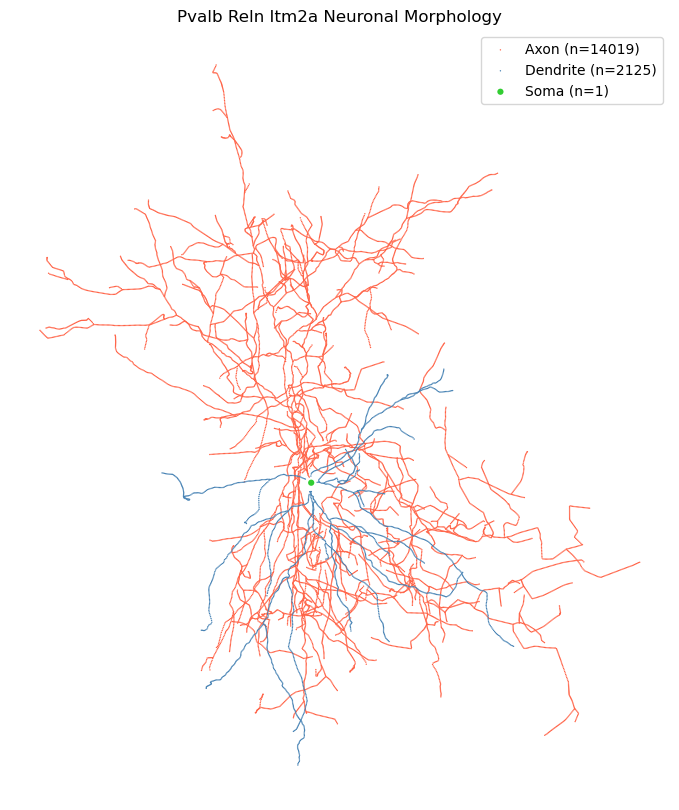

In [21]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Pvalb Reln Itm2a Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


# Pvalb Sema3e Kank4

In [33]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Pvalb Sema3e Kank4") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/652306478_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "652306478_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


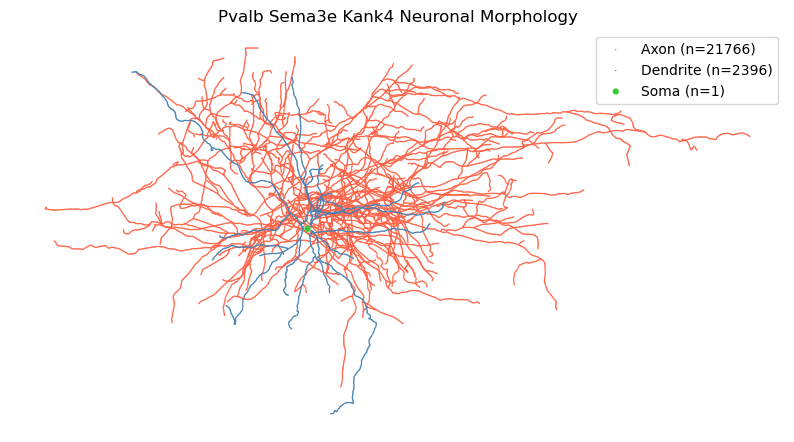

In [34]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Pvalb Sema3e Kank4 Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


# Sst Esm1

In [35]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Sst Esm1") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/601811091_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "601811091_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


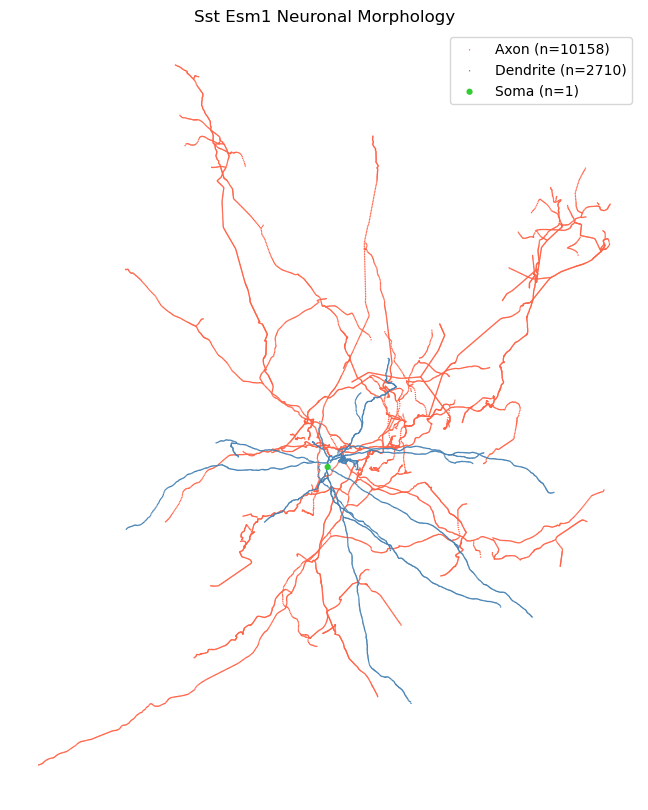

In [36]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Sst Esm1 Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()


In [37]:
fe= FeatureExtractor()
fe.register_features(default_features)
feature_extraction_run = fe.extract(Data(morph))

2024-08-29 02:07:06,758 root         INFO     skipping mark (validation failed): type
2024-08-29 02:07:06,762 root         INFO     skipping mark (validation failed): type
2024-08-29 02:07:06,763 root         INFO     skipping mark (validation failed): type
2024-08-29 02:07:06,765 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x0000023422901B90>>
2024-08-29 02:07:06,766 root         INFO     skipping feature: apical_dendrite.compartment.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:07:06,766 root         INFO     skipping feature: apical_dendrite.tip.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:07:06,766 root         INFO     skipping feature: apical_dendrite.bifurcation.dimension. Found extra marks: ['RequiresApical']
2024-08-29 02:07:06,767 root         INFO     skipping feature: apical_dendrite.node.dimension. Found 

2024-08-29 02:07:06,792 root         INFO     skipping feature: apical_dendrite.apical_dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresApical', 'RequiresLayeredPointDepths']
2024-08-29 02:07:06,793 root         INFO     selected features: ['dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'axon.compartment.dimension', 'all_neurites.compartment.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'axon.tip.dimension', 'all_neurites.tip.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'axon.bifurcation.dimension', 'all_neurites.bifurcation.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'axon.node.dimension', 'all_neurites.node.dimension', 'dendrite.num_nodes', 'basal_dendrite.num_nodes', 'axon.num_nodes', 'all_neurites.num_nodes', 'dendrite.num_branches', 'basal_dendrite.num_branches', 'axon.num_branches', 'all_neurites.num_branches', 'dendri

ZeroDivisionError: division by zero

In [ ]:
feature_extraction_run.results

In [ ]:
width = feature_extraction_run.results["axon.node.dimension"]["width"]
height = feature_extraction_run.results["axon.node.dimension"]["height"]
wh_ratio = width / height
print(width, height, wh_ratio)

# Sncg Gpr50

In [38]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Sncg Gpr50") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]
my_ttype_with_recon_metadata.iloc[0, :]
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]
swc_urls["archive_uri"].values[0]

'ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/652516963_transformed.swc'

from ftplib import FTP

def download_file(ftp_server, ftp_port, ftp_path, filename):
    ftp = FTP()
    ftp.connect(ftp_server, ftp_port)
    ftp.login()
    ftp.cwd(ftp_path)
    
    with open(filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
    
    ftp.quit()

# FTP server details
ftp_server = "download.brainlib.org"
ftp_port = 8811
ftp_path = "biccn/zeng/pseq/morph/200526"
filename = "652516963_transformed.swc"

# Download the file
download_file(ftp_server, ftp_port, ftp_path, filename)

print("File downloaded successfully.")


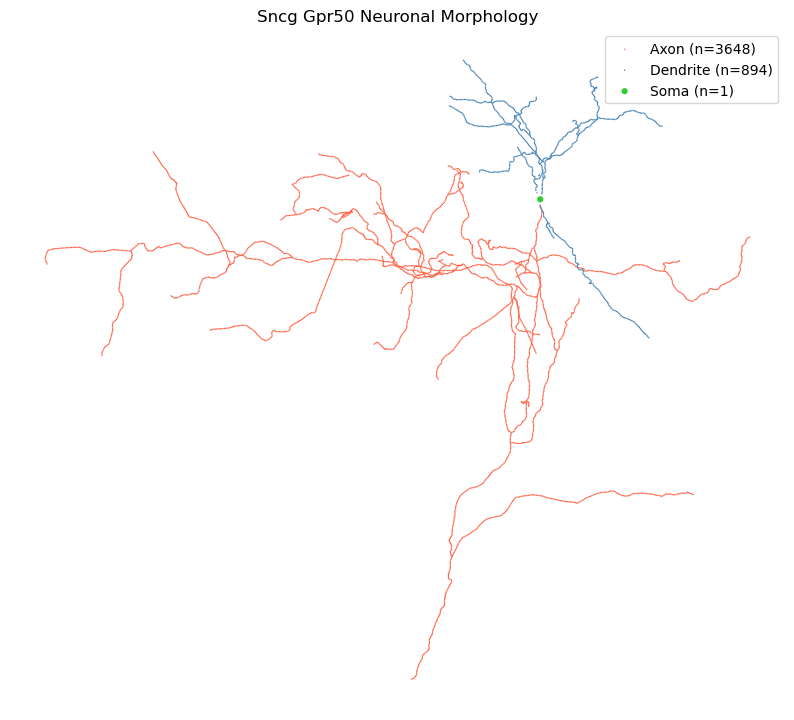

In [39]:
swc_path = swc_urls["file_name"].values[0]
swc_path
import matplotlib.pyplot as plt
import seaborn as sns
morph = morphology_from_swc(swc_path)
# Assuming 'morph' is defined as previously discussed
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

# Extract coordinates for each component
axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]
dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]
soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]

# Define colors for visual distinction
colors = {
    'axon': '#FF6347',  # Tomato red
    'dendrite': '#4682B4',  # Steel blue
    'soma': '#32CD32'  # Lime green
}

# Create the plot
plt.figure(figsize=(10, 10))

# Plot each component with different colors and markers
plt.scatter(axon_x, axon_y, s=1, color=colors['axon'], label=f'Axon (n={len(axon_nodes)})', edgecolor="none")
plt.scatter(dend_x, dend_y, s=1, color=colors['dendrite'], label=f'Dendrite (n={len(dend_nodes)})', edgecolor="none")
plt.scatter(soma_x, soma_y, s=20, color=colors['soma'], label=f'Soma (n={len(soma_nodes)})', edgecolor="none")

# Enhancing the plot
plt.gca().set(xticks=[], yticks=[])  # Remove ticks
plt.gca().set_aspect('equal')        # Ensure equal aspect ratio
plt.legend(loc='upper right')        # Position the legend
plt.title("Sncg Gpr50 Neuronal Morphology")     # Add a title to the plot
sns.despine(left=True, bottom=True)  # Clean up plot borders

# Display the plot
plt.show()
